<a href="https://colab.research.google.com/github/ducanhng85/Balanced-Tree-Clothing-Co./blob/main/CALIFORNIA_HOUSING_PRICES___%C4%90%E1%BB%A9c_Anh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#**1. AIM OF PROJECT**
**The goal of this Machine Learning project is to predict the median house prices based on the other features available in the dataset**

#**2. LOAD & CLEANING DATA**

#2.1. Load data


In [ ]:
url='https://drive.google.com/file/d/11FNiezxEsA_1Z1PloOSlJSUwnlL9IRUy/view'#
url='https://drive.google.com/uc?id=' + url.split('/')[-2]#
data = pd.read_csv(url)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 2.2. Cleaning Data

**Missing Data Analysis**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
#Fill the null total_bedrooms values with the mean of this column
data['total_bedrooms'].fillna((data['total_bedrooms'].mean()), inplace=True)

In [ ]:
# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#**3. EDA (EXPLORATORY DATA ANALYSIS)**

# 3.1. Data Exploration and Visualization

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation (which measures how dispersed the values are). The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a median_house_value lower than 119600, while 50% are lower than 179700 and 75% are lower than 264725.

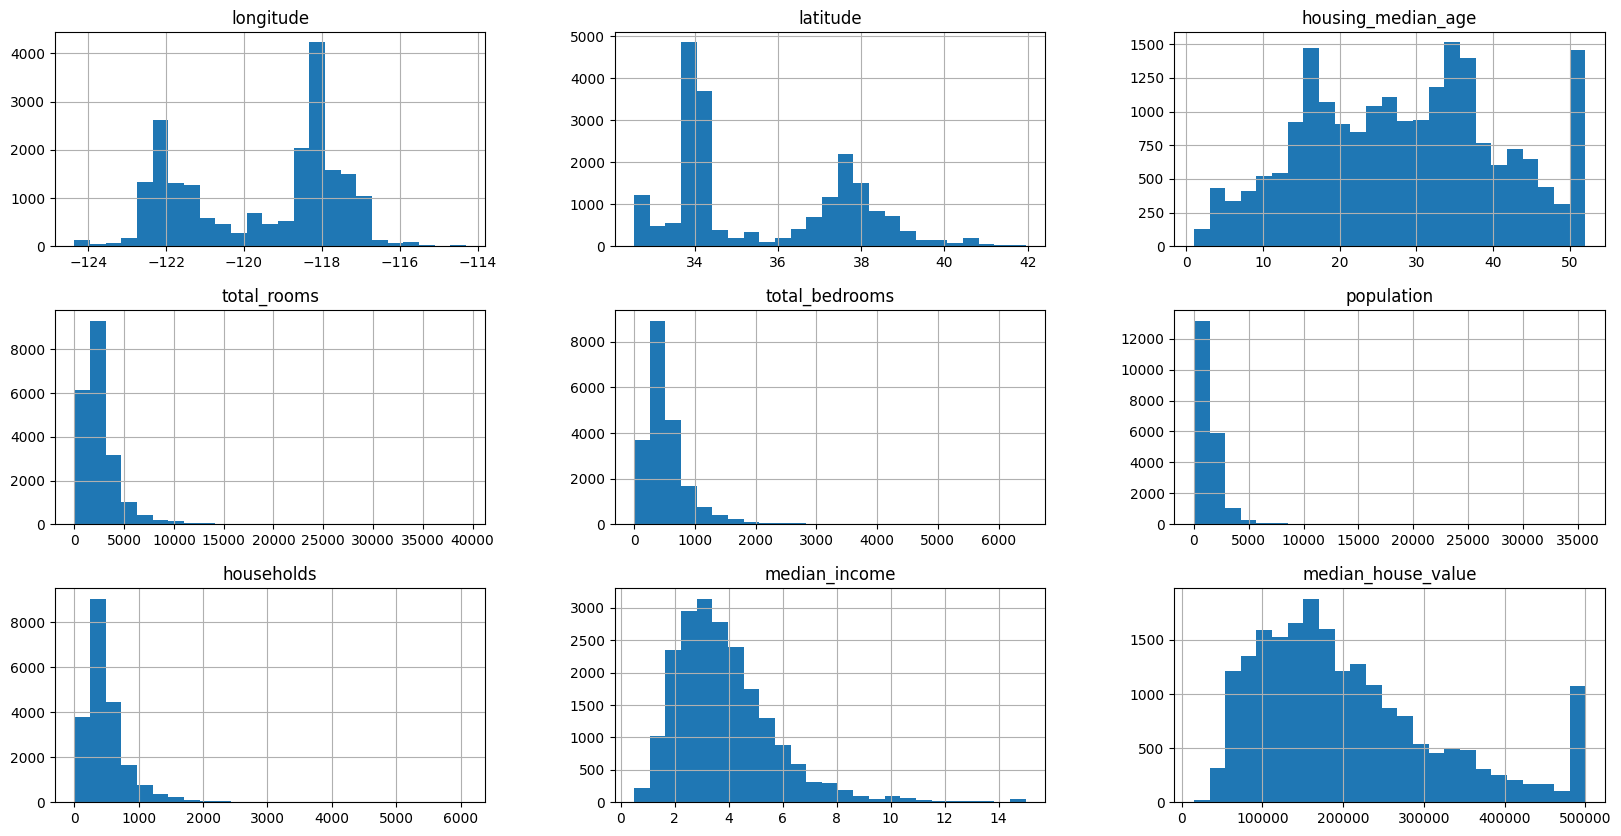

In [ ]:
data.hist(bins=25,figsize=(20,10));

- On first impression, a few outlier (inconsistent with entire set) groups are present in our data; possibly due to the way in which the data was sampled ( 'housing_median_age' & 'median_house_value' )
- House_median_age is one possible feature with such outliers. Also having a lot of local peaks (all are quite gradual) but one really odd peak at the maximum value stands out. It has some slight discontinuity in data (which becomes visible with the adjustment of bins)
- Feature Median_house_value has an odd peak at its maximum value (around 500k), which could be an outlier.
- We observe that features such as total_rooms, total_bedrooms, population, and households exhibit significant left skewness.

In [ ]:
#Z-score normalization
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Assume ocean is the category column
data_encoded = pd.get_dummies(data, columns= ['ocean_proximity'])
#Scale only the numerical columns
numerical_columns = data_encoded.select_dtypes(include=['number']).columns
data_scaled=data_encoded.copy()
data_scaled[numerical_columns]=scaler.fit_transform(data_encoded[numerical_columns])
print(data_scaled)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1      -1.322844  1.043185           -0.607019     2.045890        1.355088   
2      -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3      -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4      -1.337818  1.038503            1.856182    -0.462404       -0.615066   
...          ...       ...                 ...          ...             ...   
20635  -0.758826  1.801647           -0.289187    -0.444985       -0.390860   
20636  -0.818722  1.806329           -0.845393    -0.888704       -0.925139   
20637  -0.823713  1.778237           -0.924851    -0.174995       -0.126106   
20638  -0.873626  1.778237           -0.845393    -0.355600       -0.307379   
20639  -0.833696  1.750146           -1.004309     0.068408        0.186352   

       population  households  median_income  media

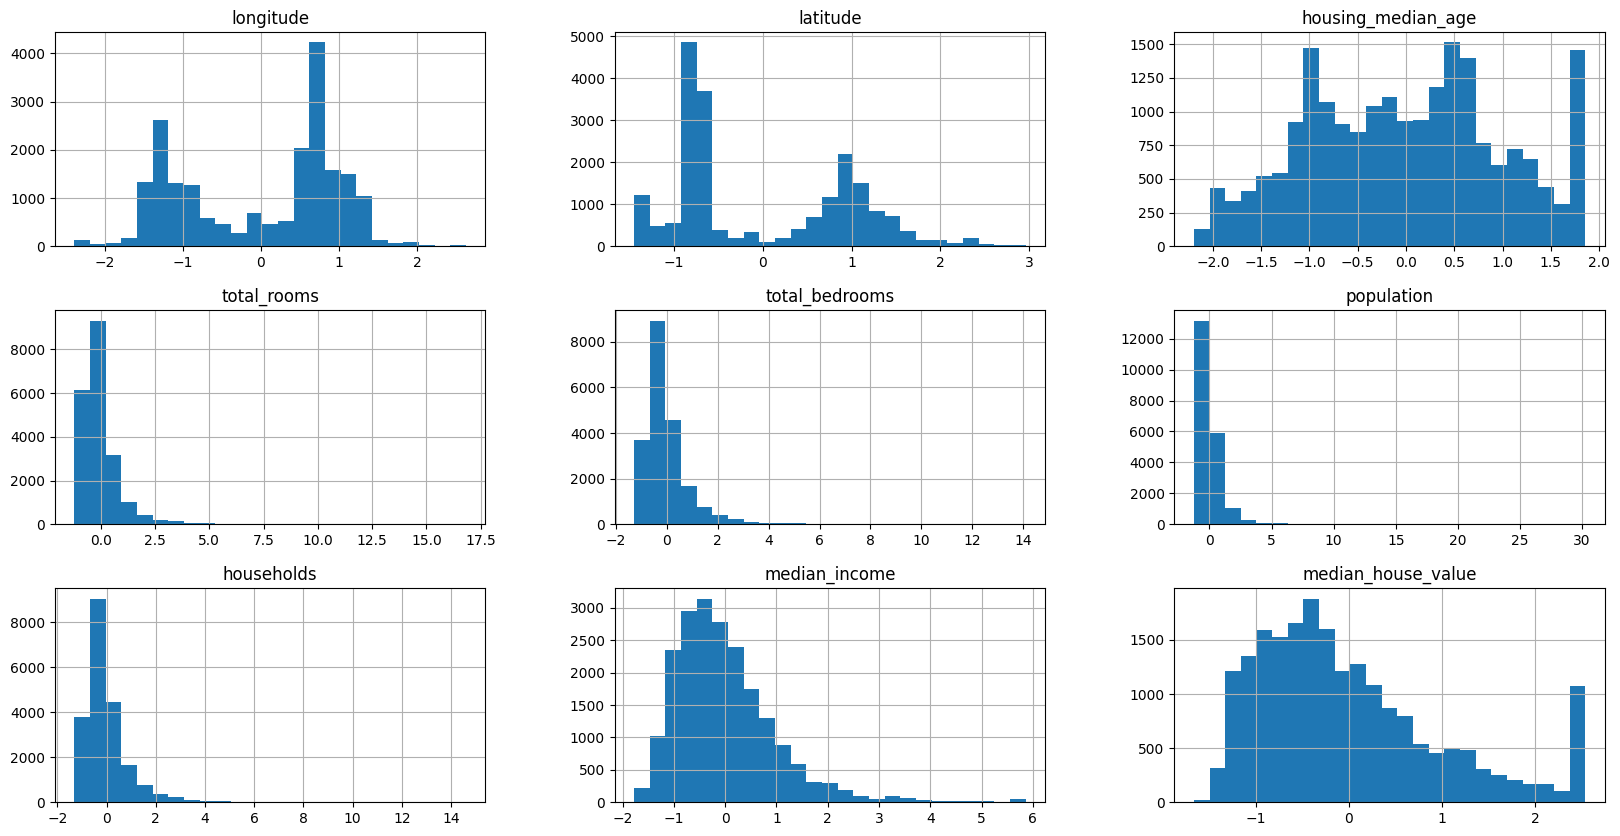

In [ ]:
data_scaled.hist(bins=25,figsize=(20,10));

<Axes: >

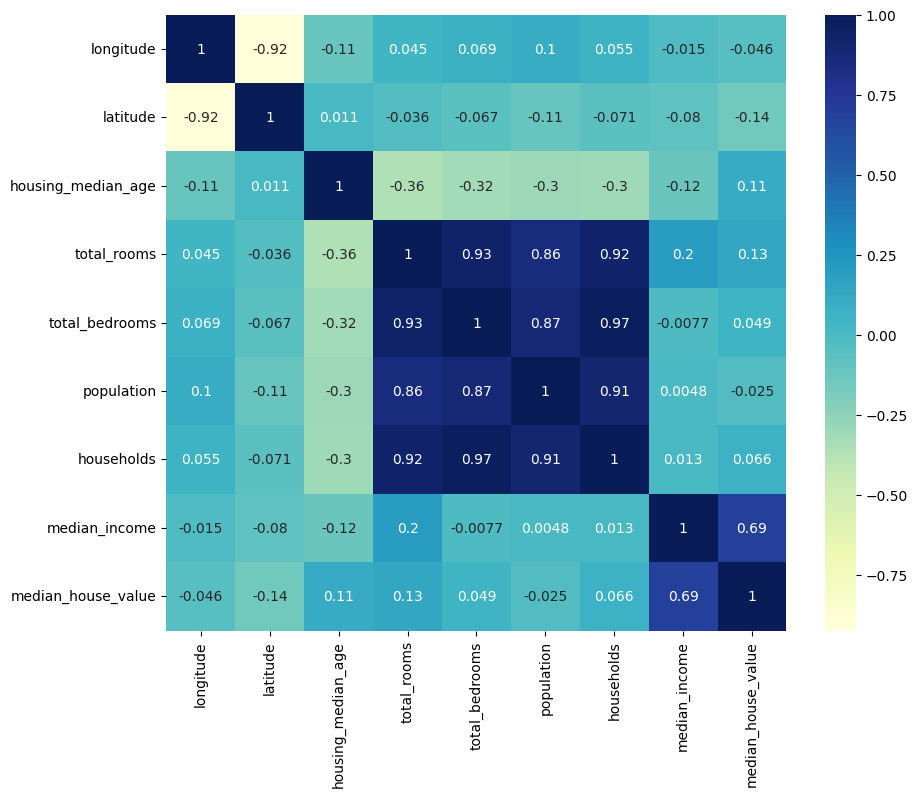

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='YlGnBu')

We can see that median_income and median_house_value are very correlated with 0.69. This is an interesting variable, it could be a great predictor to look at for predicting median house value.

The latitude on the other hand is negatively correlated with the median house value. This is interesting because it suggests that the further north you go, the lower the median house value. This could be because of the location of the houses, maybe the houses that are further north are in less desirable locations.


In [ ]:
import plotly.express as px


In [ ]:
fig = px.scatter_mapbox(data, lat='latitude', lon='longitude',
                        hover_name='ocean_proximity',
                        color='median_house_value',
                        size='population',
                        zoom=4, height=600)

# Update the map style
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()

- Coastal areas, particularly around Los Angeles and the San Francisco Bay Area, show a concentration of yellow and orange dots, indicating higher median house values.
- Inland areas and more rural regions have a higher concentration of purple dots, signifying lower median house values.

# 3.2. Unsupervised Learning - K-means Clustering

Can the California Housing data be clustered into economic regions based on median_income?:

## Scaling the Data

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
dataK = data[['longitude', 'latitude', 'median_income']]

In [ ]:
dataK

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462
...,...,...,...
20635,-121.09,39.48,1.5603
20636,-121.21,39.49,2.5568
20637,-121.22,39.43,1.7000
20638,-121.32,39.43,1.8672


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataK)
scaled_data

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -1.14259331],
       [-0.87362627,  1.77823747, -1.05458292],
       [-0.83369581,  1.75014627, -0.78012947]])

##Creating and Fitting a KMeans Model


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Calculate WCSS
wcss=[]
K = range(1,11)
random_state = 0
X = scaled_data
for k in K:
  kmeans=KMeans(n_clusters=k,
  random_state=random_state)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

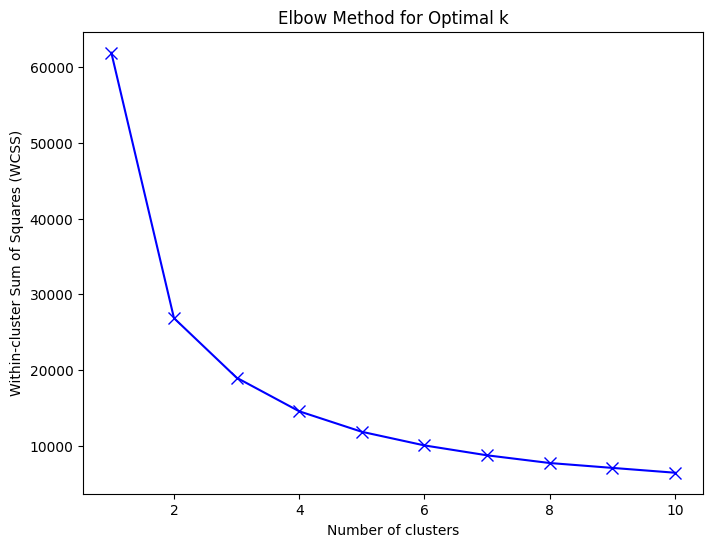

In [ ]:
#draw Elbow
plt.figure(figsize=(8,6))
plt.plot(K,wcss,'bx-',markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
cluster_labels = model.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
cluster_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
dataK['Cluster'] = cluster_labels

<ipython-input-28-2bbdaf702e31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataK

,longitude,latitude,median_income,Cluster
0,-122.23,37.88,8.3252,1
1,-122.22,37.86,8.3014,1
2,-122.24,37.85,7.2574,1
3,-122.25,37.85,5.6431,1
4,-122.25,37.85,3.8462,1
...,...,...,...,...
20635,-121.09,39.48,1.5603,1
20636,-121.21,39.49,2.5568,1
20637,-121.22,39.43,1.7000,1
20638,-121.32,39.43,1.8672,1


In [ ]:
dataK['Cluster'].value_counts()

,count
Cluster,
0,11937
1,8703


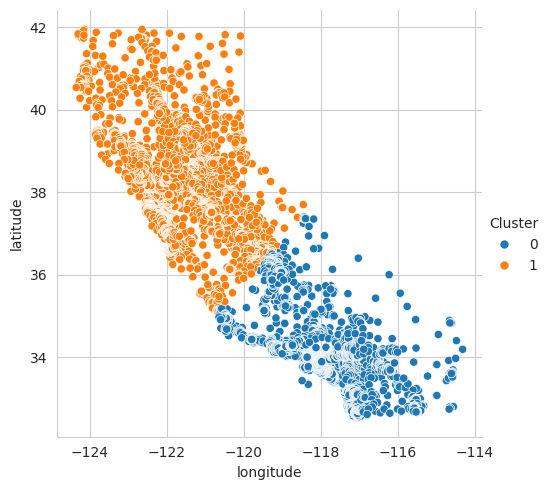

In [ ]:
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='Cluster', data=dataK, kind='scatter');

In [ ]:
!pip install plotly
import plotly.express as px
fig=px.scatter_mapbox(dataK, lat='latitude', lon='longitude',
                      hover_name='Cluster', color='Cluster',
                      zoom=4,height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.show()

- Coastal and northern regions tend to have higher median incomes, while southern and more inland regions generally have lower median incomes.
Major metropolitan areas like San Francisco and Los Angeles are likely represented by the darker clusters, indicating higher income levels.

#**4. PREPROCESSING & FEATURE ENGINEERING**

# 4.1. Skewness Correction
In the exploratory stage, we identified features exhibiting left skewness in their distributions. To address this, we can apply a log transformation (we add 1 to make sure we avoid zero values), which involves taking the logarithm of the feature values. This transformation helps compress the data and achieve a more normal distribution, which can improve the performance of certain machine learning algorithms.

In [ ]:
data['total_rooms'] = np.log(data['total_rooms']) + 1 # Adding 1 to avoid log(0)
data['total_bedrooms'] = np.log(data['total_bedrooms']) +1
data['population'] = np.log(data['population']) + 1
data['households'] = np.log(data['households']) + 1

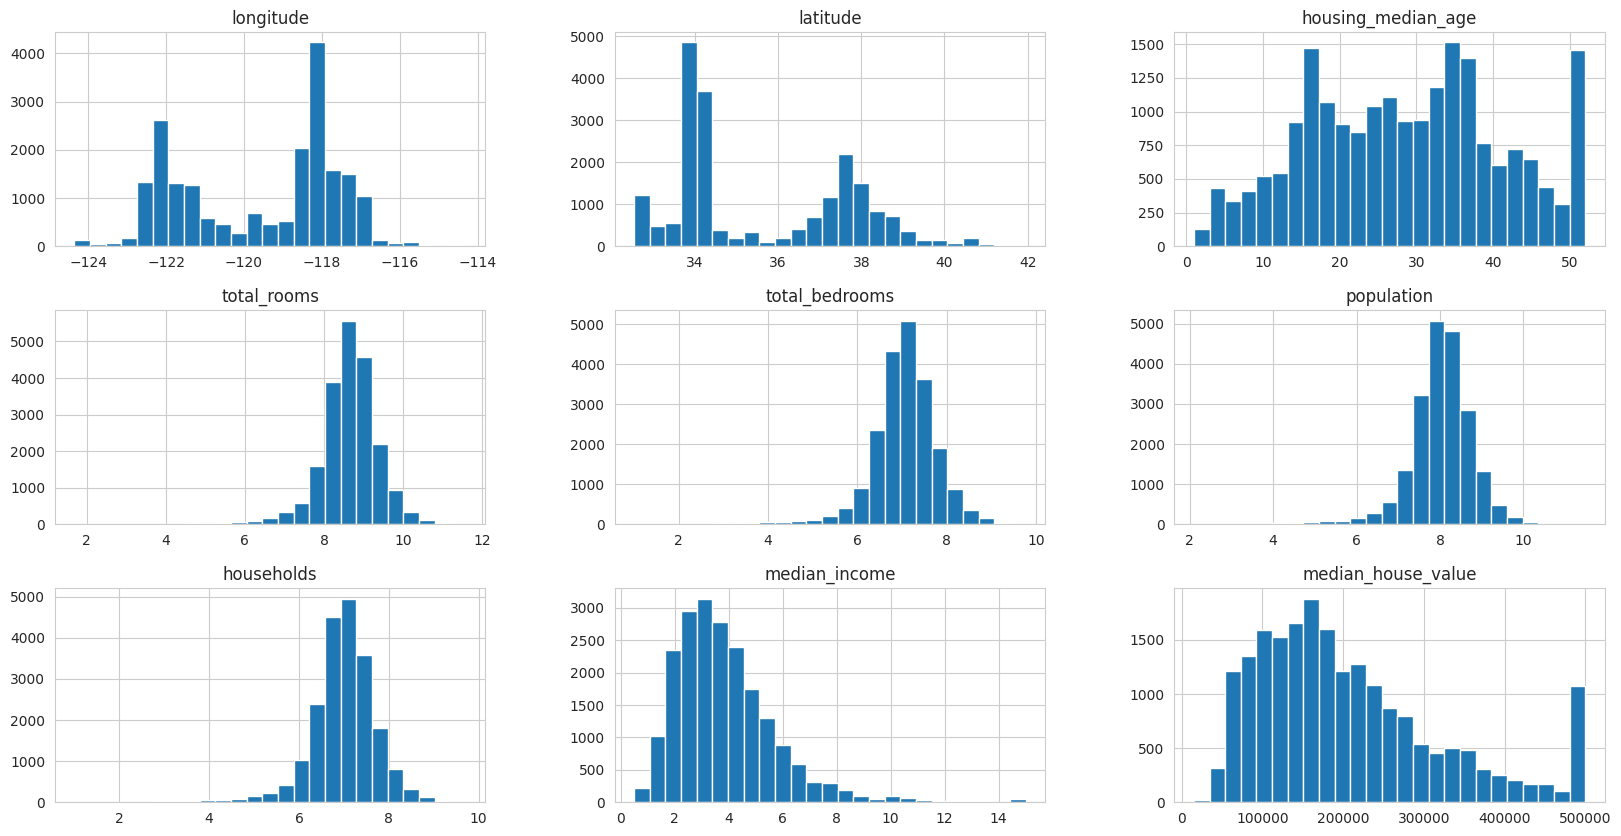

In [ ]:
data.hist(bins=25,figsize=(20,10));

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,7.779922,5.859812,6.774552,5.836282,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,9.867709,8.008505,8.783641,8.037028,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,8.290975,6.247024,7.206576,6.176150,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,8.149917,6.459586,7.324359,6.389072,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,8.394493,6.634790,7.336826,6.556828,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,8.417580,6.924256,7.739337,6.799093,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,7.546785,6.010635,6.874931,5.736198,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,8.720462,7.184149,7.914731,7.070738,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,8.528332,7.013715,7.608001,6.855072,1.8672,84700.0,INLAND


# 4.2. Remove Outliers



### Outliers in Median House Value


In [ ]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = data['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data['median_house_value'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data[(data['median_house_value'] >= lower_bound) & (data['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119600.0
264725.0
Original data shape: (20640, 10)
New data shape without outliers: (19569, 10)


## BoxPlot for Outlier Detection

### Outliers in Median Income


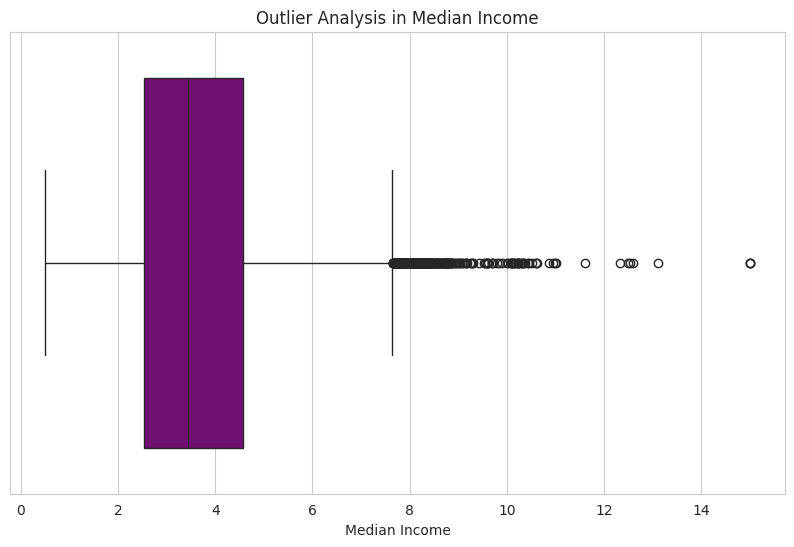

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [ ]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound)
& (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19569, 10)
Data shape without outliers: (19218, 10)


In [ ]:
data = data_no_outliers_2

# 4.3. Create new features
We observed that features such as total_bedrooms, total_rooms, and population had very low correlations with the target variable. As a result, we decided to explore alternative representations of these features. By creating new ratios and combinations of these features, we were able to generate additional attributes that exhibited stronger correlations with Median Housing Value.

In [ ]:
data['diag_coord'] = (data['longitude'] + data['latitude']) # Make a feature that contains both longtitude & latitude
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms'] #Creating a new feature bedroom_ratio
data['household_rooms'] = data['total_rooms'] / data['households'] #Creating a new feature household_rooms
data['population_household'] = data['population'] / data['households'] #Creating a new feature population_household

<ipython-input-40-9db7d21a842a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-9db7d21a842a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-9db7d21a842a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-9db7d21

In [ ]:
data.drop(['longitude', 'latitude','total_bedrooms','total_rooms','households','population'], axis=1,inplace=True)


<ipython-input-41-67196424f2b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

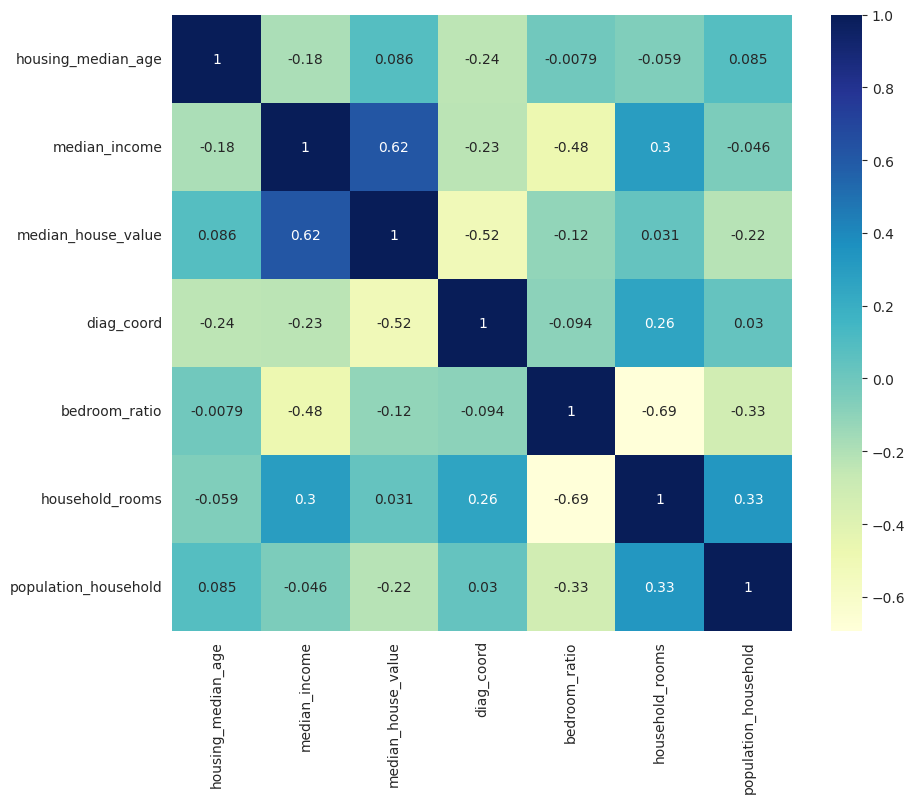

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='YlGnBu')

# 4.4. String Data Categorization to Dummy Variables

In [ ]:
data = pd.get_dummies(data, columns = ["ocean_proximity"], drop_first = True,dtype=int)


In [ ]:
data.columns

Index(['housing_median_age', 'median_income', 'median_house_value',
       'diag_coord', 'bedroom_ratio', 'household_rooms',
       'population_household', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data.head(10)

,housing_median_age,median_income,median_house_value,diag_coord,bedroom_ratio,household_rooms,population_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,52.0,7.2574,352100.0,-84.39,0.753473,1.342418,1.166840,0,0,1,0
3,52.0,5.6431,341300.0,-84.40,0.792595,1.275603,1.146389,0,0,1,0
4,52.0,3.8462,342200.0,-84.40,0.790374,1.280267,1.118960,0,0,1,0
5,52.0,4.0368,269700.0,-84.40,0.813123,1.249189,1.121475,0,0,1,0
6,52.0,3.6591,299200.0,-84.41,0.813804,1.220336,1.104301,0,0,1,0
7,52.0,3.1200,241400.0,-84.41,0.833182,1.209854,1.077785,0,0,1,0
8,42.0,2.0804,226700.0,-84.42,0.847835,1.197230,1.095621,0,0,1,0
9,52.0,3.6912,261100.0,-84.41,0.824143,1.211803,1.102468,0,0,1,0
10,52.0,3.2031,281500.0,-84.41,0.813263,1.243076,1.116772,0,0,1,0
11,52.0,3.2705,241800.0,-84.41,0.832052,1.205681,1.094410,0,0,1,0


#**5. MODELLING**
**Supervised Learning**

#5.1. Splitting the Data into Train/Test

In [ ]:
# Define your features (independent variables) and target (dependent variable)
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"] #Target variable

# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15374 samples
Test set size: 3844 samples


## Training

In [ ]:
X_train

,housing_median_age,median_income,diag_coord,bedroom_ratio,household_rooms,population_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2749,15.0,4.4821,-82.80,0.782516,1.310705,1.202757,1,0,0,0
19394,20.0,1.6759,-83.06,0.828440,1.207947,1.139256,1,0,0,0
16033,51.0,3.6581,-84.73,0.822403,1.220527,1.165033,0,0,1,0
9625,9.0,1.6172,-83.03,0.826685,1.207601,1.232112,1,0,0,0
16130,48.0,3.1290,-84.70,0.848098,1.188875,1.118892,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
15199,16.0,5.1490,-84.20,0.788293,1.271815,1.123412,0,0,0,0
9522,15.0,1.9032,-84.07,0.838015,1.202300,1.135359,0,0,0,0
12495,52.0,1.5872,-82.90,0.864571,1.166878,1.055960,1,0,0,0
2886,28.0,0.8639,-83.60,0.830742,1.220311,1.223127,1,0,0,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15374 entries, 2749 to 17933
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          15374 non-null  float64
 1   median_income               15374 non-null  float64
 2   diag_coord                  15374 non-null  float64
 3   bedroom_ratio               15374 non-null  float64
 4   household_rooms             15374 non-null  float64
 5   population_household        15374 non-null  float64
 6   ocean_proximity_INLAND      15374 non-null  int64  
 7   ocean_proximity_ISLAND      15374 non-null  int64  
 8   ocean_proximity_NEAR BAY    15374 non-null  int64  
 9   ocean_proximity_NEAR OCEAN  15374 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.3 MB


# 5.2. Train/Test/Evaluation with Sklearn



In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


Cross-validation (Catboost)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


In [ ]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [ ]:
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)

    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)

print(df_results)

We tried multiple models but the best model was with lowest RMSE "XGB Regressor".